# Week 5 Final Project

For the final project, you will identify an Unsupervised Learning problem to perform EDA and model analysis.  

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

## Gather data, determine the method of data collection and provenance of the data

The dataset for this project comes from Kaggle https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset?select=Dry_Bean.csv and is described as follows:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:

**Area (A)**: The area of a bean zone and the number of pixels within its boundaries.  
**Perimeter (P)**: Bean circumference is defined as the length of its border.  
**Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.  
**Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.  
**Aspect ratio (K)**: Defines the relationship between L and l.  
**Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.  
**Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.  
**Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.  
**Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.  
**Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.  
**Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)  
**Compactness (CO)**: Measures the roundness of an object: Ed/L  
**ShapeFactor1 (SF1)** 
**ShapeFactor2 (SF2)**  
**ShapeFactor3 (SF3)**  
**ShapeFactor4 (SF4)**

The actual class attribute is also supplied with this dataset. While this will not be used during the unsupervised analysis, this will be useful to text the accuracy of the unsupervised models against the actual known classifications.  
**Class** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)  



## Identify an Unsupervised Learning Problem (6 points)
During this course I was particularly interested in the various clustering methods that were presented, and I would like to gain a little more practice/experience with clustering using this dataset. 

The unsupervised learning problem I would like to address is "how well will different clustering algorithms and techniques identify the 7 known dry bean types within the data?"

## Import dataset

In [2]:
data = pd.read_csv("Dry_Bean.csv")
df_Y = data["Class"] # Save Class in a seperate dataframe
df_X = data.copy()
df_X.drop('Class', axis=1, inplace=True) # Remove Class from main dataset

## Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)

## Inspect data

In [3]:
df_X

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13608     0.822730      0.006681      0.001888      0.676884      0.996767  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[13611 rows x 16 columns]

## Visualise data

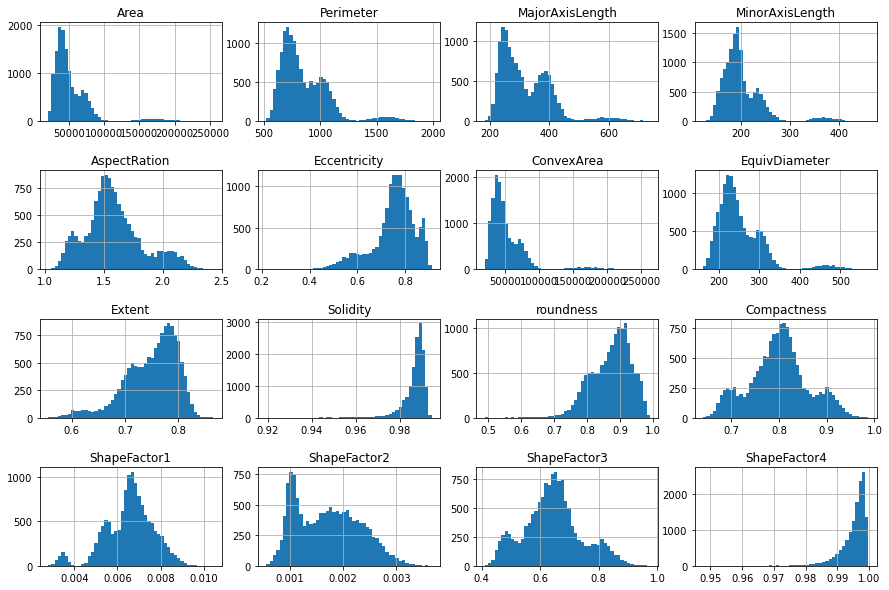

In [4]:
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(df_X.columns):   
    ax = plt.subplot(4, 4, i + 1) # add a new subplot iteratively
    df_X[column].hist(ax=ax, bins=50)
    ax.set_title(column)

From the graphs above, there are no obvious problems or issues with the data. Whilst some of the fields are left or right skews, there are no extreme outliers.

In [5]:
# Check for any missing or null values
df_X.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

For the table above there are no missing values. This is importantto check as many machine learning algorithms (including PCA - used below!) behave badly or incorrectly with missing values.  
If there were missing values I would consider either deleting those rows, or imputing the missing value using the average value of the k-nearest neighbours.

In [6]:
# Check if there are any columns which are highly correlated
# If so, then we need to look at feature reduction
corr_matrix = ((df_X.corr())*100).astype(int)
corr_matrix.style.background_gradient(cmap='Blues')

In [7]:
# There are indeed a few features which have very high correlation
# For example:
# Area - Perimeter       0.96
# Area - MajorAxisLength 0.93
# Area - MinorAxisLength 0.95
# Area - ConvexArea      0.99 (!)
# Area - EquivDiameter   0.98 (!)

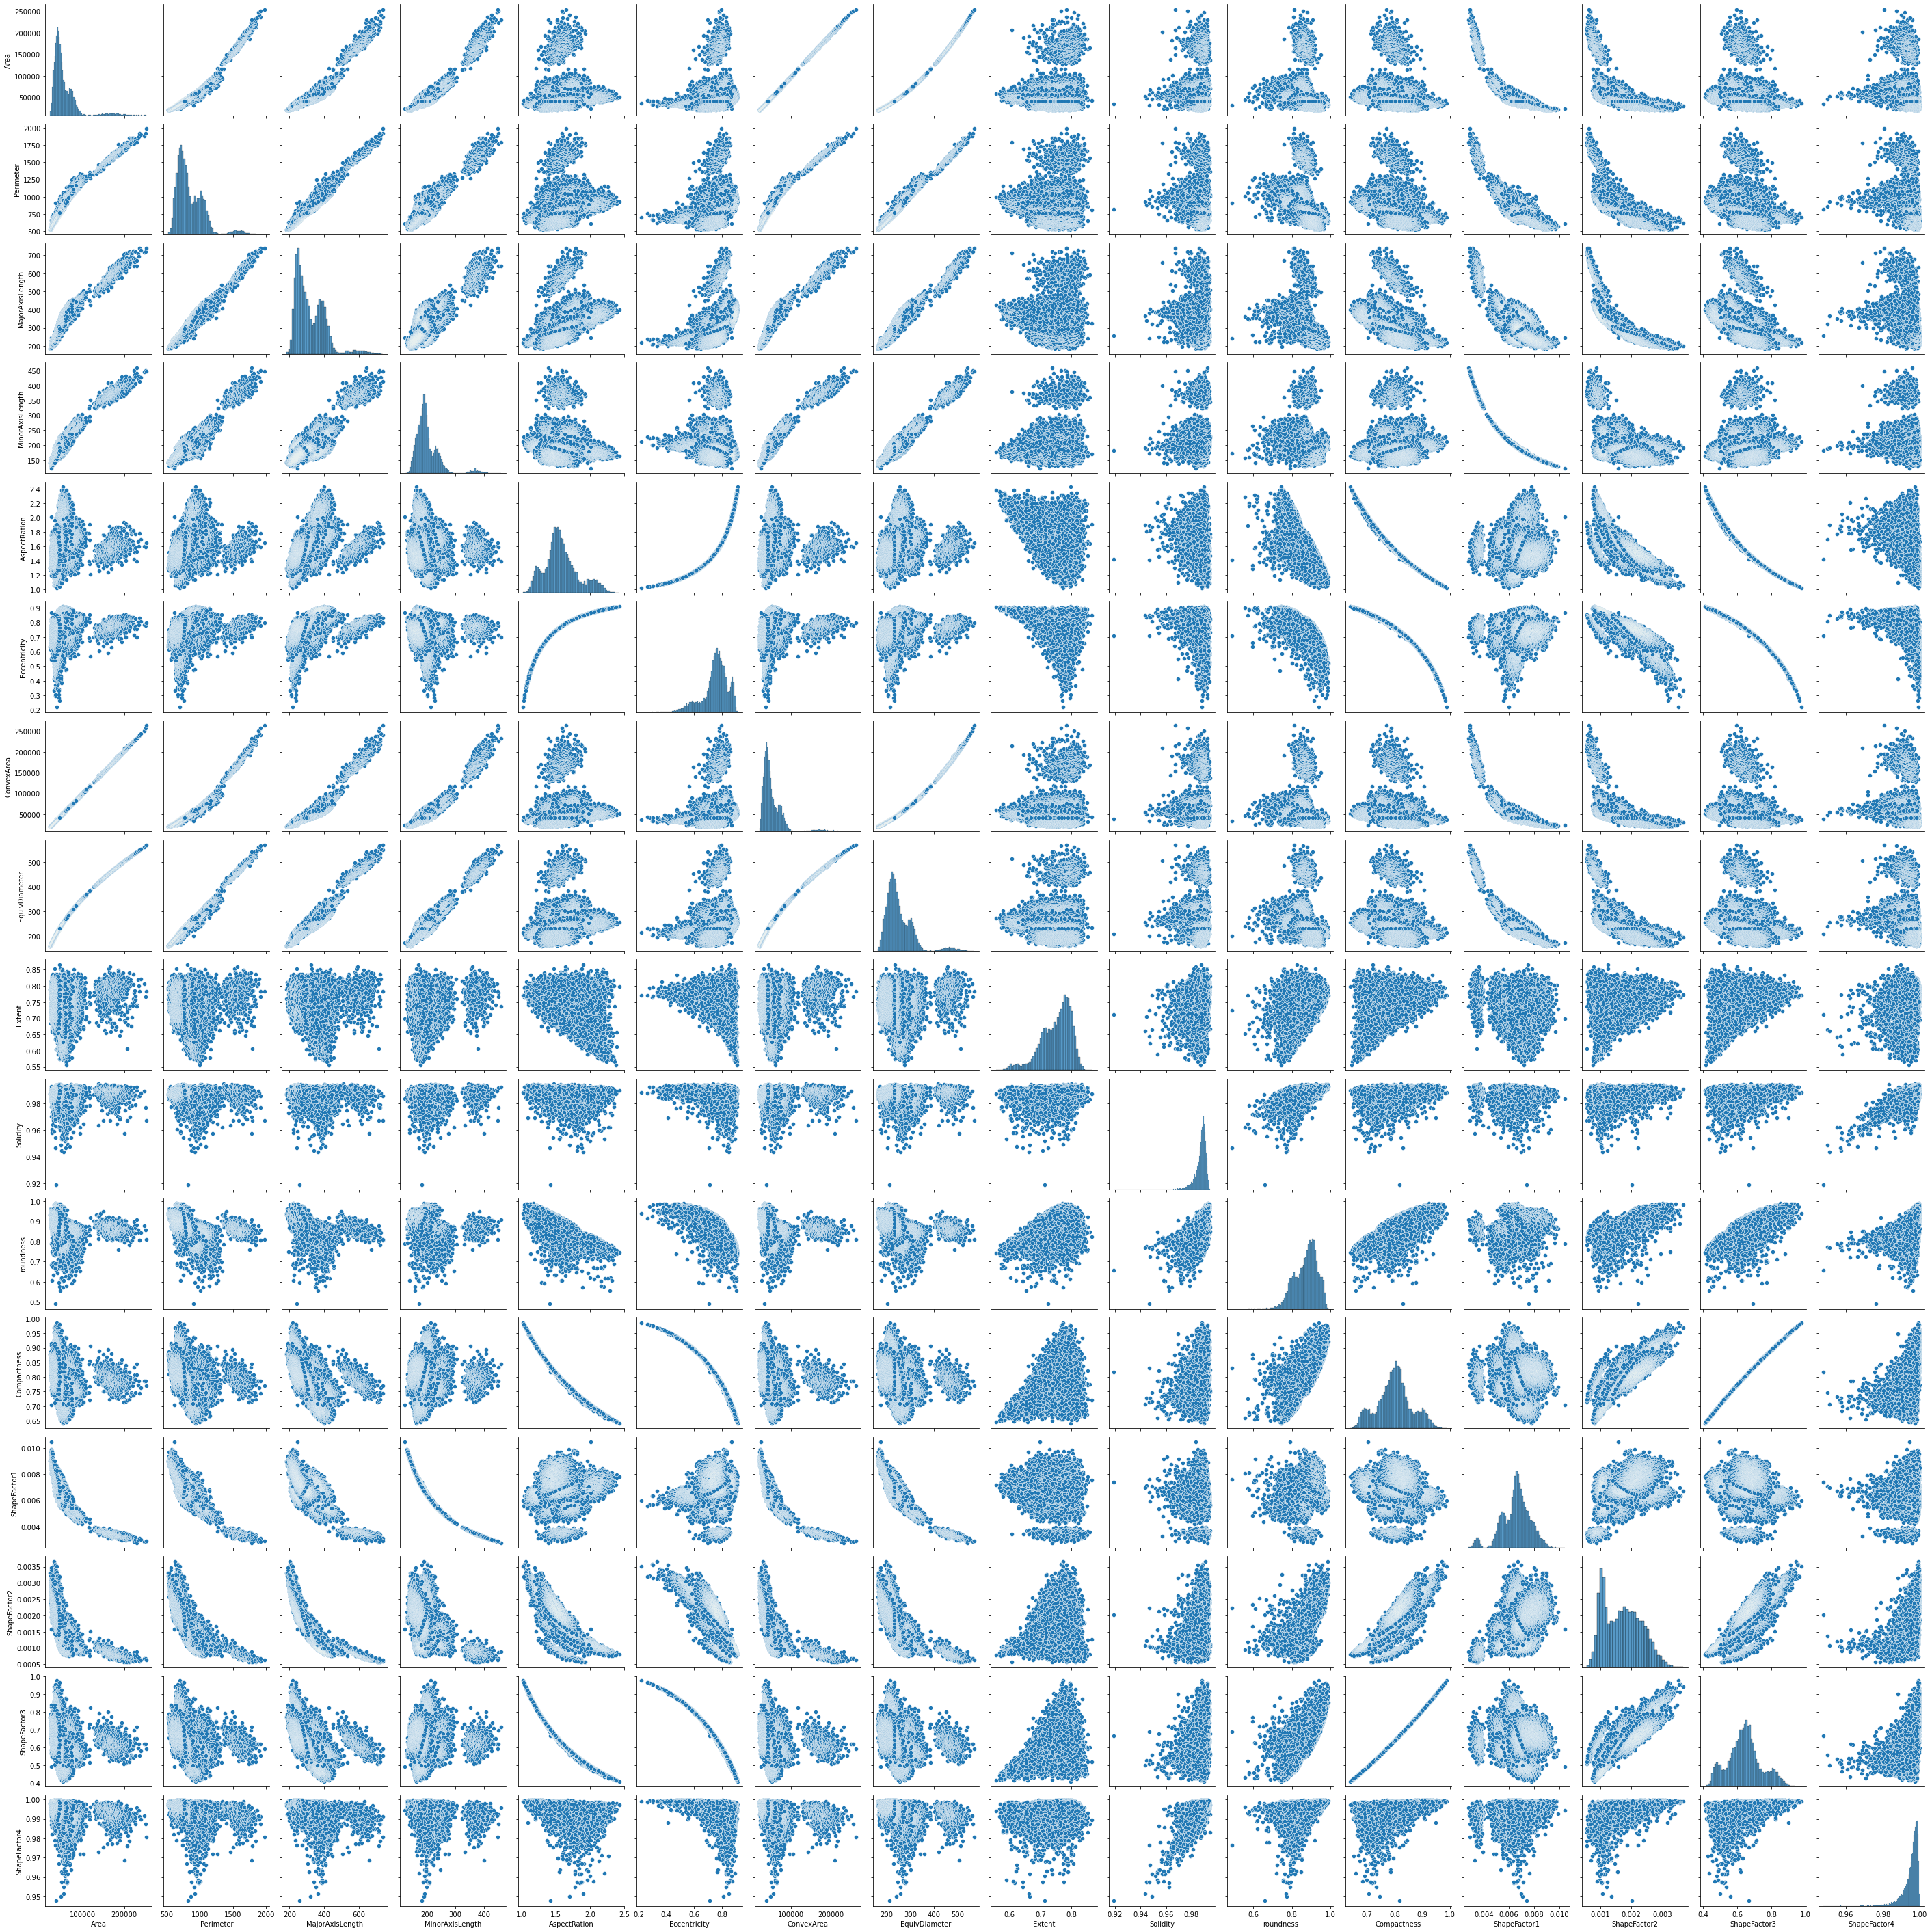

In [8]:
sns.pairplot(data)

The pair-plots above very clearly show the pairs of features which are highly correlated by showing a straight or curved line. Ideally the pair-plots should be like "clouds", with no obvious patterns of any correlation or similarity.

## Feature Reduction (PCA)

Given the very high correlation between some of the features, it makes sense to reduce the number of features before 
continuing with any data mining.

Principal Component Analysis (PCA) is a good choice, and it will be interesting to see how many significant features we will end up with down from the intitial 16. It is particularly handy to get down to 2 principal components, as these are easily plotted on a scatter plot and (hopefully) will reveal clusters visually.

Standardize the Data  
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

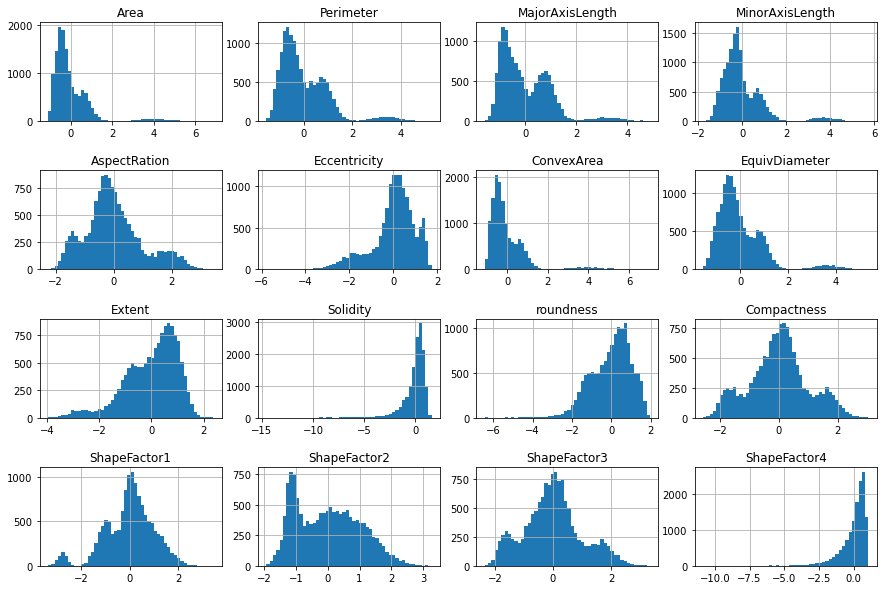

In [9]:
df_X_std = pd.DataFrame(StandardScaler().fit_transform(df_X), columns = list(df_X.columns))

plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(df_X_std.columns):   
    ax = plt.subplot(4, 4, i + 1) # add a new subplot iteratively
    df_X_std[column].hist(ax=ax, bins=50)
    ax.set_title(column)

Perform PCA.  
Set PCA to find only enough Principal Components to explain 99% of the variance

In [10]:
pca=PCA(0.99) # 99% variance
principalComponents = pca.fit_transform(df_X_std) # Note using standardised dataset df_X_std
df_PCA = pd.DataFrame(data = principalComponents)
cols = []
for col in df_PCA.columns: cols.append("PC" + str(col)) # Rename columns to PC0, PC1, ...
df_PCA.columns = cols
df_PCA

PC0       PC1       PC2       PC3       PC4       PC5       PC6
0     -4.981561  1.824697  0.749021 -0.390812 -0.033531  0.301212  0.610269
1     -5.436792  2.932365  2.182374 -0.431960  1.226464  0.045575  1.691342
2     -4.758088  1.826884  0.514038 -0.125854  0.131505  0.208538  0.599563
3     -4.300541  2.003661  3.554447  0.082964  0.800766  0.502323  0.659708
4     -6.349340  4.088205  1.179199 -0.830357 -0.037073 -0.278306  1.728546
...         ...       ...       ...       ...       ...       ...       ...
13606 -1.125616 -0.441079 -0.875509 -0.719279 -0.298148  0.026482 -0.484382
13607 -1.605011  0.495998 -0.840558  0.797433  0.017084 -0.090453 -0.321913
13608 -1.417515  0.141194 -0.387206 -0.486439 -0.383555 -0.137333 -0.333377
13609 -1.114666 -0.212679  0.144088 -0.841903 -0.486805 -0.097160 -0.358602
13610 -0.766437 -0.646514 -0.994121  0.814679  0.258258  0.052163 -0.295865

[13611 rows x 7 columns]

From the output above, the PCA process has managed to reduce the number of features from 16 down to 7, and still be able to account for 99% of the variation in the data.  

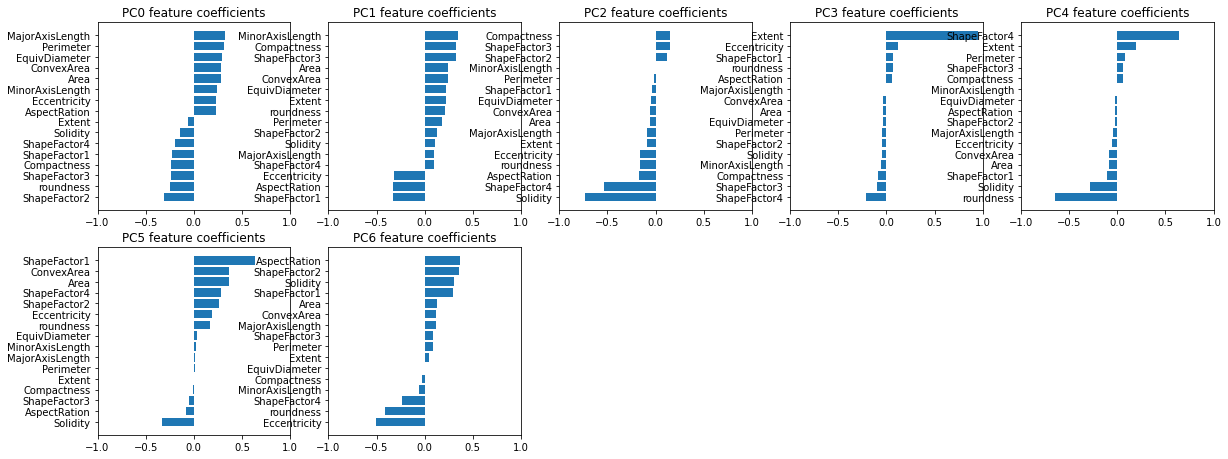

In [11]:
loadings = pd.DataFrame(pca.components_.T, index=df_X_std.columns)
plt.subplots(figsize=(20, 20))
for i, column in enumerate(df_PCA.columns):   
    plt.subplot(5, 5, i + 1)   
    x,y=df_X_std.columns, loadings[i]
    y,x = zip(*sorted(zip(y,x))) # sort by value
    plt.barh(x,y)
    plt.title(df_PCA.columns[i] + " feature coefficients")
    plt.xlim(-1,1)
plt.show();

The charts above show the loading of the original features coefficients.  
The most significal principle component PC0 seems to use a relativeley even weighting of all 16 features. This would suggest that no single feature has a significant influence on the class variable.

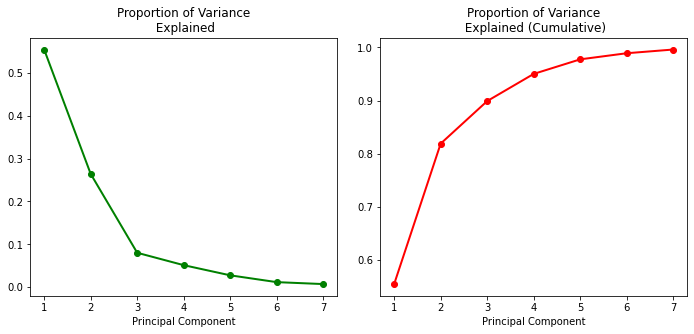

In [12]:
PC_values = np.arange(pca.n_components_) + 1
plt.subplots(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(PC_values, pca.explained_variance_ratio_, 'go-', linewidth=2)
plt.locator_params(axis="x", integer=True, tight=True)
plt.title('Proportion of Variance\n Explained')
plt.xlabel('Principal Component')

plt.subplot(1, 2, 2)
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.locator_params(axis="x", integer=True, tight=True)
plt.title('Proportion of Variance\n Explained (Cumulative)')
plt.xlabel('Principal Component')


plt.tight_layout(pad=2)
plt.show();

Just as a safety check, the charts above confirm that indeed that 7 principle components are sufficient to explain 99% of the variance in the data.

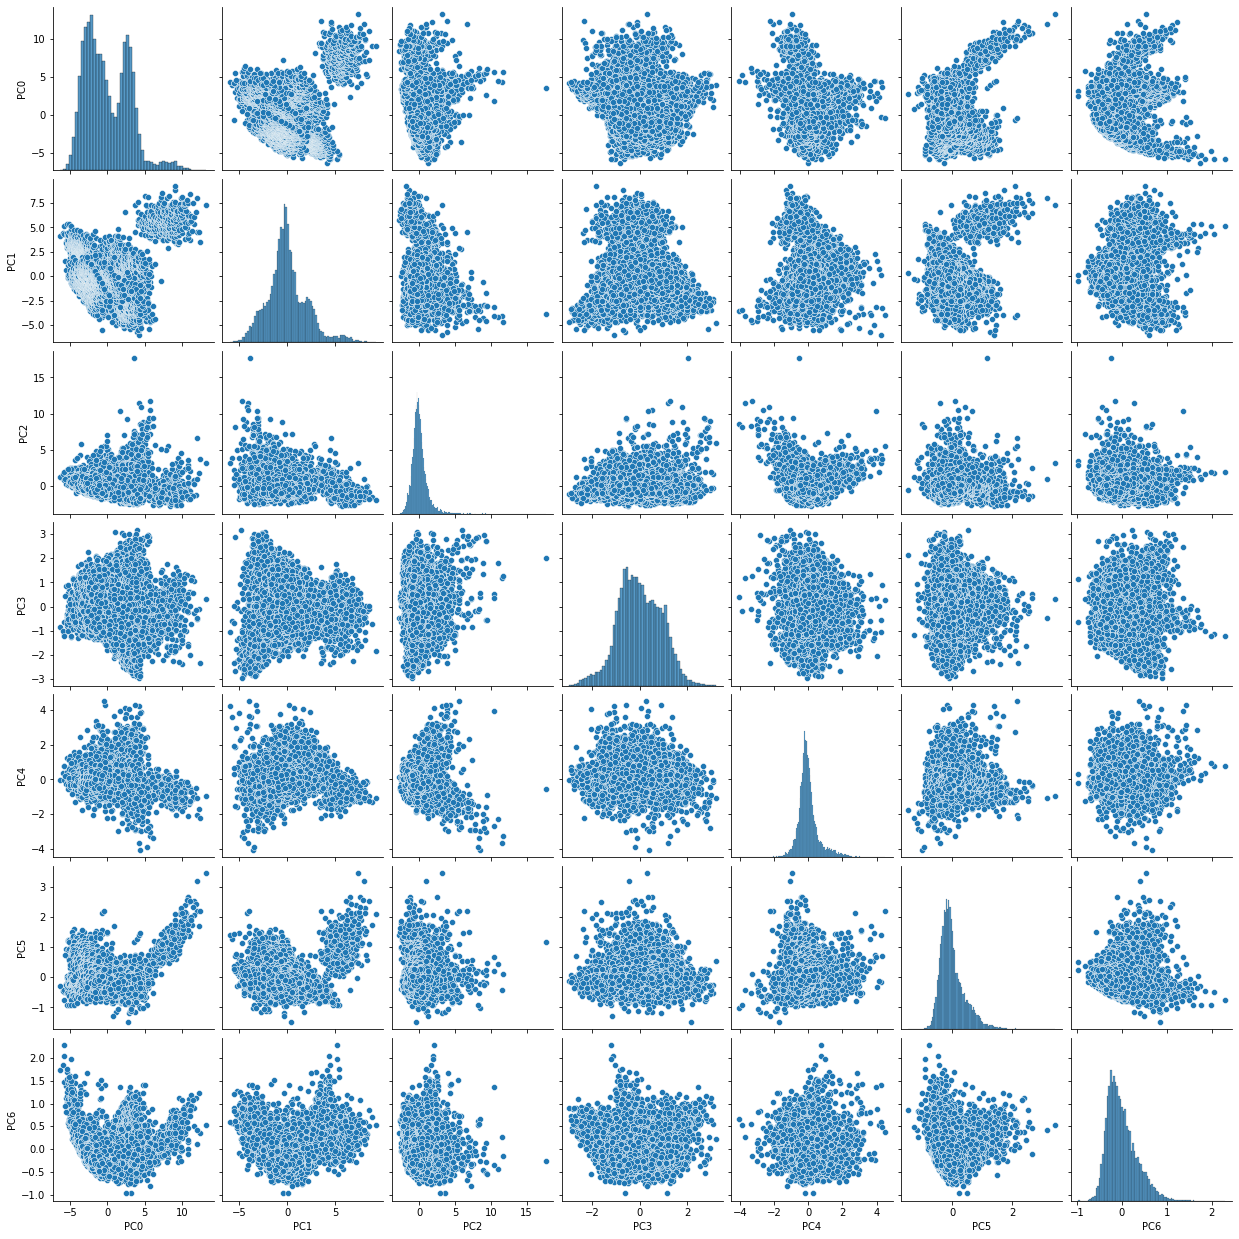

In [13]:
sns.pairplot(df_PCA);

The pair plot above of the 7 principal components is looking good, in that they all look like random clusters of data with no obvious correlations between themselves.  
Good job PCA!

## Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions

Now that the feature reduction is complete, we are ready to apply one or more unsupervised mechine learning algorithms to these principal components.

###  Simple K-Means Clustering
The first choice of model will be simple clustering where the optimal number of clusters is unknown. Let's loop around and try a range of cluster numbers, and use the silhouette coefficent to select the best one. Hopefully this will be 7!

[0.3980730594956234, 0.4062921686572424, 0.3432325083253971, 0.35844093699837565, 0.3617890962166724, 0.31152830144804194, 0.3040371429791809, 0.2893210599067076, 0.2923212930646873]


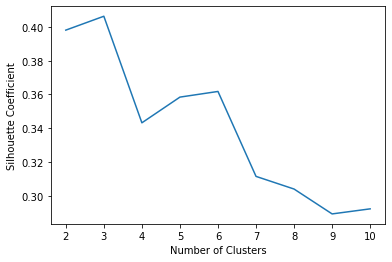

In [14]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11): # start at 2 clusters for silhouette coefficient
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_PCA)
    score = silhouette_score(df_PCA, kmeans.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show();

Well that did not go well at all! The chart above gives no indication that there may be 7 clusters in that dataset, but more like 2 or 3.   
We got a hint from PCA that this might happen, as the first principal component used almost all of the original 16 features with very similar weightings.

### Hierarchical Clustering

Let's try a hierarchical clustering model and see if it fares any better.

In [15]:
# Helper function
def linkage_matrix(model):
    # Create linkage matrix
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([model.children_, model.distances_,counts]).astype(float)

As explained in the course lecture, the choice of affinity and linkage methods can greatly affect the outcome of the hierarchical clustering algorithm. The code below tries a variety of different combinations on the principal components and displays the dendrograms.

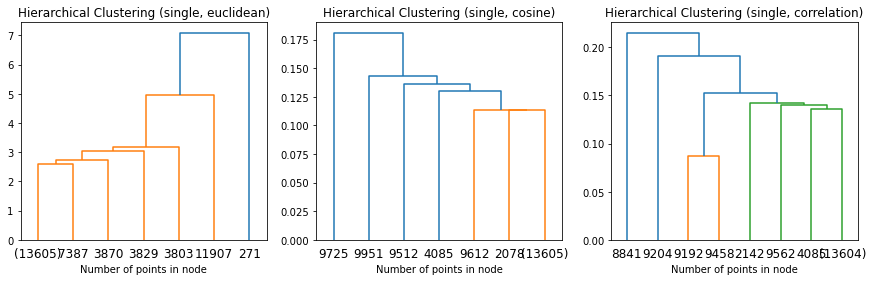

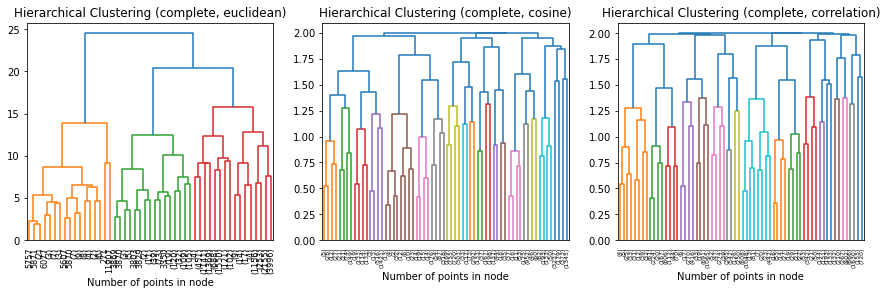

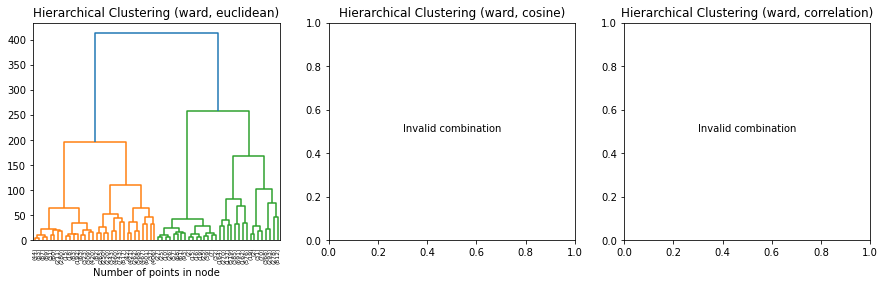

In [16]:
methods=["single","complete","ward"]
metrics=["euclidean", "cosine", "correlation"]

for method in methods:
    plt.subplots(figsize=(15, 4))
    for i, metric in enumerate(metrics):
        try:       
            plt.subplot(1, 3, i+1)   
            model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity=metric, linkage=method)
            clusters = model.fit_predict(df_PCA) # Use PCA dataset
            plt.xlabel("Number of points in node")
            plt.title("Hierarchical Clustering ("+method+", "+metric+")")
            dendrogram(linkage_matrix(model), truncate_mode='level', p=5)    
        except Exception as e:
            plt.title("Hierarchical Clustering ("+method+", "+metric+")")
            plt.text(0.3, 0.5, "Invalid combination")
    plt.show()

# Conclusion

Well this is awkward - none of the various combinations of parameters give the slightest hint that there may be in fact 7 groups in the dataset!  
I suppose the conclusion to be drawn from this is that it is actually quite difficult to tell the seven types of dry bean apart from the 16 measurements, and that unsupervised learning techniques such as k-means clustering and hierarchical clustering are just not able to discover any pattern to effectively distinguish them apart.  In other words, for this dry bean dataset a supervised model in required.

# Supervised Multiclass Logistic Regression

As a final quick check, lets apply a supervised learning algorithm to the dataset and confirm that it is indeed able to learn an accurate model.  
Given that the data is all numeric, and there are 7 different calls values, I will use the Multi-class Logistic Regression algorithm.

In [17]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

data = pd.read_csv("Dry_Bean.csv")
X=data.drop('Class', axis=1)
y=data["Class"]
# Class values
list(y.unique())

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

In [18]:
# Split the dataset into an 80/20 train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

In [19]:
# Fit the Logistic Regression model to the training data
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

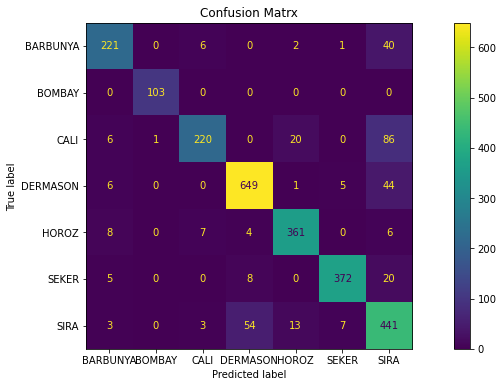

In [20]:
# Display confusion matrix
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Confusion Matrx')
disp=metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax)
disp.confusion_matrix;

In [21]:
# Score the Linear Model against the test data
lm.score(X_test, y_test)
# Not too shabby; 87% accuracy

0.8692618435549027